In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import cross_val_score
from imblearn import over_sampling
from collections import Counter
from pprint import pprint

In [2]:
cars = pd.read_csv("car_results.csv", header='infer')
cars

,Name,Price,Year,Mileage,Additional Details,Location,Link,Label
0,TOYOTA COROLLA VERSO MANUAL DIESEL 7 SEATER 2009,"£1,650",2009,"115,000 miles","Seller type: Trade, Fuel type: Diesel, Engine ...","Neasden, London",https://www.gumtree.com/p/toyota/toyota-coroll...,BCLV
1,2016 Hyundai i800 2.5 CRDi SE Auto Euro 6 5dr ...,"£12,980",2016,"128,100 miles","Seller type: Trade, Fuel type: Diesel, Engine ...","Edmonton, London",https://www.gumtree.com/p/hyundai/2016-hyundai...,BCLV
2,Fiat 500 1.2 Lounge Dualogic (s/s) 3dr Petrol,"£8,795",2013,"24,768 miles","Seller type: Trade, Fuel type: Petrol, Engine ...","Mitcham, London",https://www.gumtree.com/p/fiat/fiat-500-1.2-lo...,GCHV
3,BMW 120,"£2,750",2012,"160,000 miles","Fuel type: Diesel, Engine size: 1,995 cc","Chingford, London",https://www.gumtree.com/p/bmw/bmw-120/1430712934,BCLV
4,Pco Toyota Prius plus,"£20,500",2017,"95,000 miles",Fuel type: Hybrid Electric,"Heathrow, London",https://www.gumtree.com/p/toyota/pco-toyota-pr...,BCHV
...,...,...,...,...,...,...,...,...
262,2021 Audi E-TRON SPORTBACK 300kW 55 Quattro 95...,"£75,995",2021,"5,617 miles","Seller type: Trade, Fuel type: Electric, Engin...","Coventry, West Midlands",https://www.gumtree.com/p/audi/2021-audi-e-tro...,GCHV
263,2018 Volvo XC60 2.0 T5 [250] Momentum 5dr AWD ...,"£28,000",2018,"24,311 miles","Seller type: Trade, Fuel type: Petrol, Engine ...","Nottingham, Nottinghamshire",https://www.gumtree.com/p/volvo/2018-volvo-xc6...,GCLV
264,2007 MERCEDES M-CLASS Ml 320 Cdi Sport 3 Auto ...,"£4,295",2007,"140,472 miles","Seller type: Trade, Fuel type: Diesel, Engine ...","Bridgwater, Somerset",https://www.gumtree.com/p/mercedes-benz/2007-m...,BCLV
265,2021 Mercedes-Benz GLE DIESEL ESTATE GLE 300d ...,"£61,995",2021,"5,863 miles","Seller type: Trade, Fuel type: Diesel, Engine ...","Lincoln, Lincolnshire",https://www.gumtree.com/p/mercedes-benz/2021-m...,GCLV


In [3]:
cars["Price"] = cars["Price"].str.replace(r'\W', "")
cars

C:\Users\sanck\AppData\Local\Temp/ipykernel_14780/1539425958.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  cars["Price"] = cars["Price"].str.replace(r'\W', "")


,Name,Price,Year,Mileage,Additional Details,Location,Link,Label
0,TOYOTA COROLLA VERSO MANUAL DIESEL 7 SEATER 2009,1650,2009,"115,000 miles","Seller type: Trade, Fuel type: Diesel, Engine ...","Neasden, London",https://www.gumtree.com/p/toyota/toyota-coroll...,BCLV
1,2016 Hyundai i800 2.5 CRDi SE Auto Euro 6 5dr ...,12980,2016,"128,100 miles","Seller type: Trade, Fuel type: Diesel, Engine ...","Edmonton, London",https://www.gumtree.com/p/hyundai/2016-hyundai...,BCLV
2,Fiat 500 1.2 Lounge Dualogic (s/s) 3dr Petrol,8795,2013,"24,768 miles","Seller type: Trade, Fuel type: Petrol, Engine ...","Mitcham, London",https://www.gumtree.com/p/fiat/fiat-500-1.2-lo...,GCHV
3,BMW 120,2750,2012,"160,000 miles","Fuel type: Diesel, Engine size: 1,995 cc","Chingford, London",https://www.gumtree.com/p/bmw/bmw-120/1430712934,BCLV
4,Pco Toyota Prius plus,20500,2017,"95,000 miles",Fuel type: Hybrid Electric,"Heathrow, London",https://www.gumtree.com/p/toyota/pco-toyota-pr...,BCHV
...,...,...,...,...,...,...,...,...
262,2021 Audi E-TRON SPORTBACK 300kW 55 Quattro 95...,75995,2021,"5,617 miles","Seller type: Trade, Fuel type: Electric, Engin...","Coventry, West Midlands",https://www.gumtree.com/p/audi/2021-audi-e-tro...,GCHV
263,2018 Volvo XC60 2.0 T5 [250] Momentum 5dr AWD ...,28000,2018,"24,311 miles","Seller type: Trade, Fuel type: Petrol, Engine ...","Nottingham, Nottinghamshire",https://www.gumtree.com/p/volvo/2018-volvo-xc6...,GCLV
264,2007 MERCEDES M-CLASS Ml 320 Cdi Sport 3 Auto ...,4295,2007,"140,472 miles","Seller type: Trade, Fuel type: Diesel, Engine ...","Bridgwater, Somerset",https://www.gumtree.com/p/mercedes-benz/2007-m...,BCLV
265,2021 Mercedes-Benz GLE DIESEL ESTATE GLE 300d ...,61995,2021,"5,863 miles","Seller type: Trade, Fuel type: Diesel, Engine ...","Lincoln, Lincolnshire",https://www.gumtree.com/p/mercedes-benz/2021-m...,GCLV


In [4]:
cars["Mileage"] = cars["Mileage"].str.replace(r'\W', "")
cars["Mileage"] = cars["Mileage"].str.replace(r'miles', "")
cars

C:\Users\sanck\AppData\Local\Temp/ipykernel_14780/406665254.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  cars["Mileage"] = cars["Mileage"].str.replace(r'\W', "")


,Name,Price,Year,Mileage,Additional Details,Location,Link,Label
0,TOYOTA COROLLA VERSO MANUAL DIESEL 7 SEATER 2009,1650,2009,115000,"Seller type: Trade, Fuel type: Diesel, Engine ...","Neasden, London",https://www.gumtree.com/p/toyota/toyota-coroll...,BCLV
1,2016 Hyundai i800 2.5 CRDi SE Auto Euro 6 5dr ...,12980,2016,128100,"Seller type: Trade, Fuel type: Diesel, Engine ...","Edmonton, London",https://www.gumtree.com/p/hyundai/2016-hyundai...,BCLV
2,Fiat 500 1.2 Lounge Dualogic (s/s) 3dr Petrol,8795,2013,24768,"Seller type: Trade, Fuel type: Petrol, Engine ...","Mitcham, London",https://www.gumtree.com/p/fiat/fiat-500-1.2-lo...,GCHV
3,BMW 120,2750,2012,160000,"Fuel type: Diesel, Engine size: 1,995 cc","Chingford, London",https://www.gumtree.com/p/bmw/bmw-120/1430712934,BCLV
4,Pco Toyota Prius plus,20500,2017,95000,Fuel type: Hybrid Electric,"Heathrow, London",https://www.gumtree.com/p/toyota/pco-toyota-pr...,BCHV
...,...,...,...,...,...,...,...,...
262,2021 Audi E-TRON SPORTBACK 300kW 55 Quattro 95...,75995,2021,5617,"Seller type: Trade, Fuel type: Electric, Engin...","Coventry, West Midlands",https://www.gumtree.com/p/audi/2021-audi-e-tro...,GCHV
263,2018 Volvo XC60 2.0 T5 [250] Momentum 5dr AWD ...,28000,2018,24311,"Seller type: Trade, Fuel type: Petrol, Engine ...","Nottingham, Nottinghamshire",https://www.gumtree.com/p/volvo/2018-volvo-xc6...,GCLV
264,2007 MERCEDES M-CLASS Ml 320 Cdi Sport 3 Auto ...,4295,2007,140472,"Seller type: Trade, Fuel type: Diesel, Engine ...","Bridgwater, Somerset",https://www.gumtree.com/p/mercedes-benz/2007-m...,BCLV
265,2021 Mercedes-Benz GLE DIESEL ESTATE GLE 300d ...,61995,2021,5863,"Seller type: Trade, Fuel type: Diesel, Engine ...","Lincoln, Lincolnshire",https://www.gumtree.com/p/mercedes-benz/2021-m...,GCLV


In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Name                267 non-null    object
 1   Price               267 non-null    object
 2   Year                267 non-null    int64 
 3   Mileage             267 non-null    object
 4   Additional Details  267 non-null    object
 5   Location            267 non-null    object
 6   Link                267 non-null    object
 7   Label               267 non-null    object
dtypes: int64(1), object(7)
memory usage: 16.8+ KB


In [6]:
del cars['Additional Details']
del cars['Location']

In [7]:
del cars['Link']

In [8]:
cars

,Name,Price,Year,Mileage,Label
0,TOYOTA COROLLA VERSO MANUAL DIESEL 7 SEATER 2009,1650,2009,115000,BCLV
1,2016 Hyundai i800 2.5 CRDi SE Auto Euro 6 5dr ...,12980,2016,128100,BCLV
2,Fiat 500 1.2 Lounge Dualogic (s/s) 3dr Petrol,8795,2013,24768,GCHV
3,BMW 120,2750,2012,160000,BCLV
4,Pco Toyota Prius plus,20500,2017,95000,BCHV
...,...,...,...,...,...
262,2021 Audi E-TRON SPORTBACK 300kW 55 Quattro 95...,75995,2021,5617,GCHV
263,2018 Volvo XC60 2.0 T5 [250] Momentum 5dr AWD ...,28000,2018,24311,GCLV
264,2007 MERCEDES M-CLASS Ml 320 Cdi Sport 3 Auto ...,4295,2007,140472,BCLV
265,2021 Mercedes-Benz GLE DIESEL ESTATE GLE 300d ...,61995,2021,5863,GCLV


In [9]:
cars[["Price", "Year","Mileage"]] = cars[["Price", "Year","Mileage"]].apply(pd.to_numeric)

In [10]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     267 non-null    object
 1   Price    267 non-null    int64 
 2   Year     267 non-null    int64 
 3   Mileage  267 non-null    int64 
 4   Label    267 non-null    object
dtypes: int64(3), object(2)
memory usage: 10.6+ KB


In [11]:
cars.shape

(267, 5)

In [12]:
cars.describe()

,Price,Year,Mileage
count,267.000000,267.000000,267.000000
mean,15787.071161,2014.464419,53158.471910
std,19183.818096,5.110218,44318.474153
min,1150.000000,1994.000000,10.000000
25%,6500.000000,2011.500000,18357.500000
50%,12795.000000,2016.000000,37533.000000
75%,17799.500000,2018.000000,80022.500000
max,175000.000000,2022.000000,201619.000000


In [13]:
cars.isna().sum()

Name       0
Price      0
Year       0
Mileage    0
Label      0
dtype: int64

## Decision Tree Classifier

In [14]:
X = cars.drop(['Name','Label'], axis = 1)
Y = cars['Label']

In [15]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, Y_resampled = ros.fit_resample(X,Y)
print(sorted(Counter(Y_resampled).items()),Y_resampled.shape)

[('BCHV', 131), ('BCLV', 131), ('GCHV', 131), ('GCLV', 131)] (524,)


In [16]:
Y_resampled

0      BCLV
1      BCLV
2      GCHV
3      BCLV
4      BCHV
       ... 
519    GCHV
520    GCHV
521    GCHV
522    GCHV
523    GCHV
Name: Label, Length: 524, dtype: object

In [17]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X_resampled, Y_resampled)

In [18]:
X_resampled

,Price,Year,Mileage
0,1650,2009,115000
1,12980,2016,128100
2,8795,2013,24768
3,2750,2012,160000
4,20500,2017,95000
...,...,...,...
519,7695,2011,40300
520,19000,2017,36823
521,5200,2006,117000
522,15790,2015,10648


In [19]:
Y_resampled

0      BCLV
1      BCLV
2      GCHV
3      BCLV
4      BCHV
       ... 
519    GCHV
520    GCHV
521    GCHV
522    GCHV
523    GCHV
Name: Label, Length: 524, dtype: object

[Text(110.30803977272728, 210.192, 'X[2] <= 30129.0\nentropy = 2.0\nsamples = 524\nvalue = [131, 131, 131, 131]'),
 Text(49.45909090909091, 195.696, 'X[2] <= 23568.0\nentropy = 1.524\nsamples = 153\nvalue = [5, 16, 53, 79]'),
 Text(25.870909090909095, 181.2, 'X[2] <= 15897.5\nentropy = 1.325\nsamples = 94\nvalue = [5, 11, 12, 66]'),
 Text(15.218181818181819, 166.704, 'X[1] <= 2008.0\nentropy = 0.783\nsamples = 67\nvalue = [0, 3, 8, 56]'),
 Text(12.174545454545456, 152.208, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3, 0, 0]'),
 Text(18.261818181818185, 152.208, 'X[2] <= 12495.0\nentropy = 0.544\nsamples = 64\nvalue = [0, 0, 8, 56]'),
 Text(15.218181818181819, 137.712, 'X[2] <= 12421.0\nentropy = 0.675\nsamples = 45\nvalue = [0, 0, 8, 37]'),
 Text(12.174545454545456, 123.216, 'X[1] <= 2016.0\nentropy = 0.583\nsamples = 43\nvalue = [0, 0, 6, 37]'),
 Text(6.087272727272728, 108.72, 'X[2] <= 9574.0\nentropy = 0.971\nsamples = 5\nvalue = [0, 0, 3, 2]'),
 Text(3.043636363636364, 94.22399999999

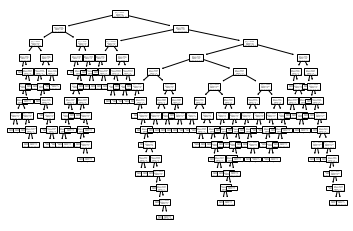

In [20]:
tree.plot_tree(clf)

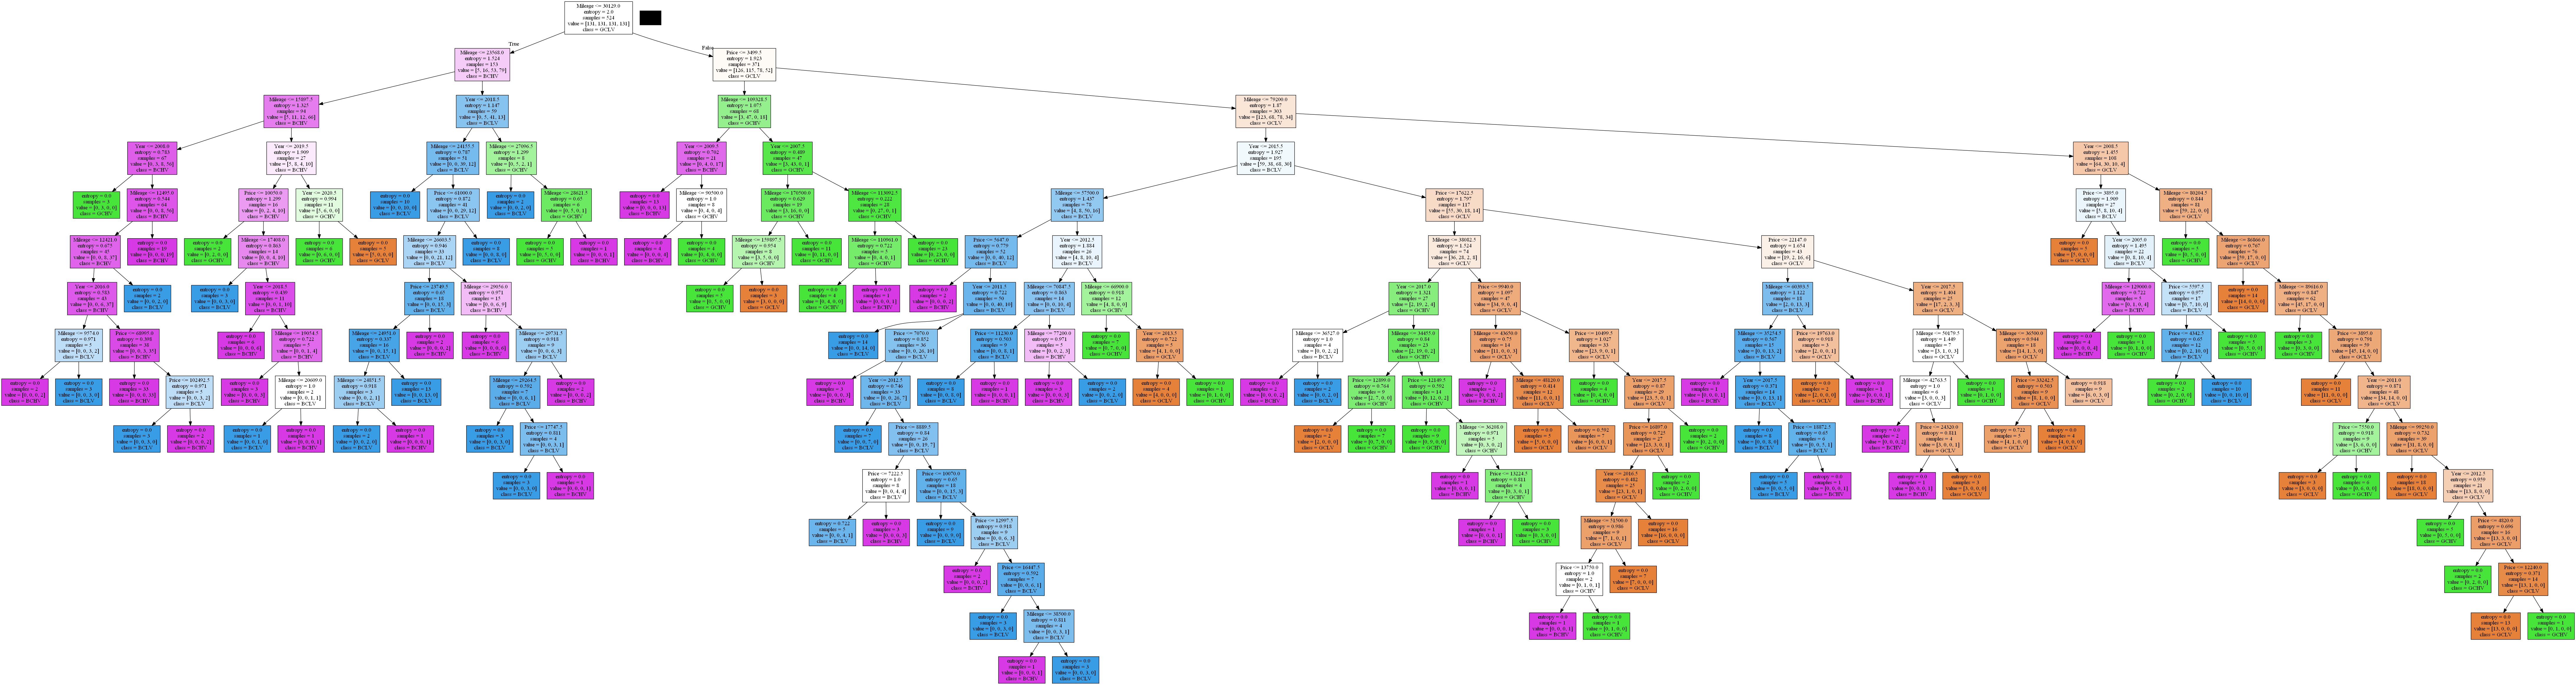

In [21]:
import pydotplus 
from IPython.display import Image

dot_data = tree.export_graphviz(clf, feature_names=X.columns, class_names=['GCLV','GCHV','BCLV','BCHV'], filled=True, 
                                out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

In [22]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(X_resampled,Y_resampled,test_size =0.30, random_state=0)

In [23]:
# train_X = train.drop(['Label'],axis=1)
# test_X = test.drop(['Label'],axis=1)
# train_Y = train['Label']
# test_Y = test['Label']

In [24]:
predY = clf.predict(test_X)
predictions = pd.concat([test_Y,pd.Series(predY,name='Predicted Class')], axis=1)
predictions

,Label,Predicted Class
0,NaN,GCHV
1,BCLV,BCLV
2,NaN,GCHV
3,NaN,GCLV
4,NaN,BCLV
...,...,...
509,GCHV,NaN
516,GCHV,NaN
519,GCHV,NaN
521,GCHV,NaN


In [25]:
predictions_updated = predictions.dropna()

In [26]:
from sklearn.metrics import accuracy_score

print('Accuracy on test data is %.2f' % (accuracy_score(predictions_updated['Label'], predictions_updated['Predicted Class'])))

Accuracy on test data is 0.20


In [27]:
predictions_updated.to_excel('predictionsbefore.xls', index = False)

C:\Users\sanck\AppData\Local\Temp/ipykernel_14780/3077353853.py:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  predictions_updated.to_excel('predictionsbefore.xls', index = False)


In [28]:
depth = []
acc=[]
for i in range(2,20):
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=i)
    clf = clf.fit(X_resampled, Y_resampled)
    # Perform 10-fold cross validation in parallel on 4 threads, and append for each max_depth the average accuracy on the 10 folds to a list called depth
    scores = cross_val_score(estimator=clf, X=train_X, y=train_Y, cv=10, scoring='accuracy', n_jobs=4)
    depth.append(i)
    acc.append(scores.mean())
print(list(zip(depth, acc)))

[(2, 0.4998498498498498), (3, 0.5249249249249249), (4, 0.5849099099099099), (5, 0.6427177177177177), (6, 0.6972222222222222), (7, 0.749024024024024), (8, 0.7873873873873874), (9, 0.8391141141141141), (10, 0.8364864864864865), (11, 0.8391891891891892), (12, 0.8474474474474475), (13, 0.839039039039039), (14, 0.8363363363363364), (15, 0.8472222222222221), (16, 0.839039039039039), (17, 0.8500750750750751), (18, 0.841891891891892), (19, 0.8472222222222221)]


In [29]:
parameters_grid = {'max_depth':range(2,20)}
clf = GridSearchCV(tree.DecisionTreeClassifier(criterion='entropy'), parameters_grid, cv=10, n_jobs=4, scoring="accuracy")
clf.fit(X=train_X, y=train_Y)
tree_model = clf.best_estimator_
print ('best accuracy and parameters are', clf.best_score_, clf.best_params_) 

best accuracy and parameters are 0.8554804804804805 {'max_depth': 17}


In [30]:
parameters_grid = {'max_depth':range(2,20), 'criterion':['gini', 'entropy']}
clf = GridSearchCV(tree.DecisionTreeClassifier(), parameters_grid, cv=10, n_jobs=4, scoring="accuracy")
clf.fit(X=train_X, y=train_Y)
best_tree_model = clf.best_estimator_
print ('best accuracy and parameters are', clf.best_score_, clf.best_params_) 

best accuracy and parameters are 0.85015015015015 {'criterion': 'entropy', 'max_depth': 14}


In [31]:
predY = best_tree_model.predict(test_X)
predictions = pd.concat([test_Y, pd.Series(predY,name='Predicted Class')], axis=1)
predictions

,Label,Predicted Class
0,NaN,GCHV
1,BCLV,BCLV
2,NaN,GCHV
3,NaN,BCHV
4,NaN,BCLV
...,...,...
509,GCHV,NaN
516,GCHV,NaN
519,GCHV,NaN
521,GCHV,NaN


In [32]:
predictions_updated = predictions.dropna()

In [33]:
from sklearn.metrics import accuracy_score

print('Accuracy on test data is %.2f' % (accuracy_score(predictions_updated['Label'], predictions_updated['Predicted Class'])))

Accuracy on test data is 0.29


In [49]:
predictions_updated.to_excel('predictionsafter.xls', index = False)

C:\Users\sanck\AppData\Local\Temp/ipykernel_14780/3395177527.py:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  predictions_updated.to_excel('predictionsafter.xls', index = False)
